## KDE animation (Gaussian kernels)

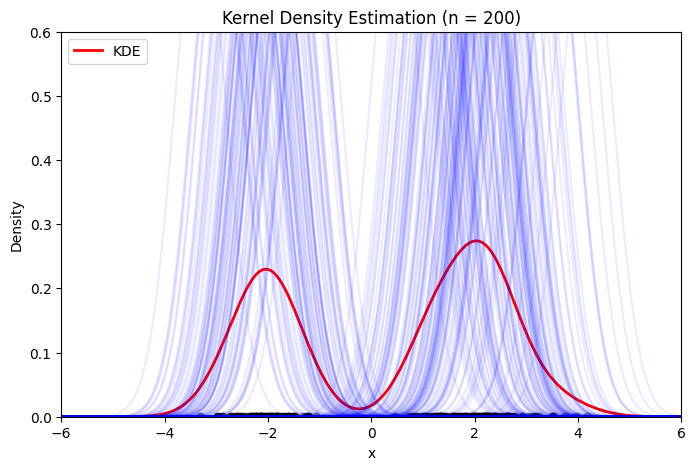

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from scipy.stats import norm

# ------------------------------------------------
# Setup
# ------------------------------------------------
os.makedirs("gifs", exist_ok=True)

np.random.seed(42)
data = np.concatenate([
    np.random.normal(-2, 0.5, 80),
    np.random.normal(2, 0.8, 120)
])

x_grid = np.linspace(-6, 6, 500)
bandwidth = 0.5

# ------------------------------------------------
# Figure
# ------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-6, 6)
ax.set_ylim(0, 0.6)
ax.set_title("Kernel Density Estimation (Gaussian KDE)")
ax.set_xlabel("x")
ax.set_ylabel("Density")

# Static scatter placeholder
scatter = ax.scatter([], [], color="black", alpha=0.4)

# KDE line
kde_line, = ax.plot([], [], "r", linewidth=2, label="KDE")

# Kernel lines (we reuse them)
kernel_lines = [ax.plot([], [], color="blue", alpha=0.08)[0] for _ in range(len(data))]

ax.legend()

# ------------------------------------------------
# Animation
# ------------------------------------------------
writer = PillowWriter(fps=3)

with writer.saving(fig, "gifs/kernel_density_estimation.gif", dpi=120):

    for i in range(1, len(data) + 1):

        subset = data[:i]

        # Update scatter
        scatter.set_offsets(np.c_[subset, np.zeros_like(subset)])

        # Reset kernel sum
        kde_sum = np.zeros_like(x_grid)

        for j, x_i in enumerate(subset):
            kernel = norm.pdf(x_grid, x_i, bandwidth)
            kde_sum += kernel
            kernel_lines[j].set_data(x_grid, kernel)

        # Hide unused kernel lines
        for j in range(len(subset), len(kernel_lines)):
            kernel_lines[j].set_data([], [])

        kde = kde_sum / len(subset)
        kde_line.set_data(x_grid, kde)

        ax.set_title(f"Kernel Density Estimation (n = {i})")

        writer.grab_frame()

plt.show()
